### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* 1 min

In [2]:
dt_signal_1 = np.load('/workspace/final_data/ica_ppg_1.npy') # 1 min ppg

In [3]:
len(dt_signal_1)

1200

In [4]:
lb_list = np.load('/workspace/final_data/ica_lb.npy')

In [5]:
data = list(dt_signal_1)

In [6]:
df = pd.DataFrame(data)

In [7]:
label = list(lb_list)

In [8]:
df['label'] = label

In [9]:
df 
# label : -1 down, 0 norm , 1 up 
# 0 norm
# -1, 1, abnorm

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,28.074800,27.284800,27.284800,26.494801,26.494801,25.704901,25.704901,24.914900,24.519899,24.914900,...,40.319199,39.529301,38.344299,37.949299,37.159401,36.369400,35.579399,34.789501,33.999500,-1.0
1,42.689098,40.714199,40.319199,39.134300,38.344299,37.554298,35.974400,35.184399,34.394501,33.604500,...,53.748600,54.143600,55.328602,56.118500,56.513500,56.118500,56.908501,56.908501,56.908501,-1.0
2,50.588799,48.613899,47.823898,45.848999,44.269001,42.689098,41.504200,39.924198,39.134300,38.739300,...,49.798801,52.168701,52.958698,54.933601,56.513500,56.908501,57.303501,58.093399,58.093399,0.0
3,35.579399,35.184399,34.789501,34.394501,33.604500,33.209499,32.419601,31.234600,30.444599,29.654699,...,61.253300,60.463299,59.673401,59.278400,57.698502,56.908501,55.328602,53.748600,51.378700,0.0
4,33.999500,33.604500,33.604500,33.209499,32.814499,32.419601,32.024601,31.629601,30.839600,30.049700,...,56.513500,56.118500,55.328602,54.143600,52.563702,51.378700,50.193802,47.823898,45.453999,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,42.294102,42.689098,43.479099,43.874100,44.269001,44.664001,45.453999,45.848999,46.243999,46.638901,...,41.899200,41.504200,41.899200,41.504200,41.899200,41.899200,42.294102,42.294102,42.294102,0.0
1196,39.529301,39.924198,40.319199,40.714199,41.109200,41.109200,41.109200,41.109200,41.109200,41.109200,...,38.344299,38.344299,38.344299,38.739300,38.739300,38.739300,39.134300,39.134300,39.529301,0.0
1197,52.168701,50.588799,48.613899,47.428902,46.243999,44.664001,43.479099,42.689098,41.899200,41.109200,...,21.754999,22.940001,26.099800,31.234600,34.789501,40.319199,45.058998,49.798801,54.933601,0.0
1198,38.739300,38.344299,37.949299,37.159401,36.764400,35.974400,35.184399,34.789501,34.394501,33.604500,...,64.413200,62.833199,61.253300,60.463299,58.488400,56.908501,55.328602,52.958698,51.378700,0.0


In [10]:
df['label'].value_counts()

 0.0    1013
-1.0     187
Name: label, dtype: int64

* bandpass filter

In [11]:
from scipy.signal import butter
from scipy.signal import lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs # 50, fs:100 
    low = lowcut / nyq # 0.5/50 = 1/100, lowcut: 0.5
    high = highcut / nyq # 15/50 = 30/100, highcut : 15
    # order : frequency cut wave
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# BPF setting 0.5 ~ 5 hz
lowcut = 0.5
highcut = 5

In [12]:
yy = butter_bandpass_filter(df[df['label'] == 0].iloc[0][:-1], lowcut, highcut, 128, order=5)

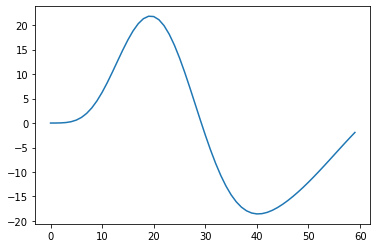

In [13]:
plt.plot(yy)

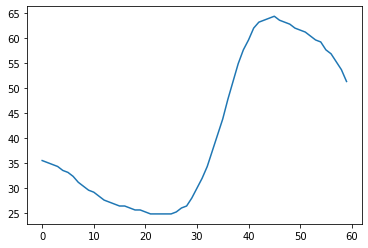

In [14]:
plt.plot(df[df['label'] == 0].iloc[1][:-1])

In [15]:
yy = butter_bandpass_filter(df[df['label'] == 0].iloc[1][:-1], lowcut, highcut, 100, order=5)

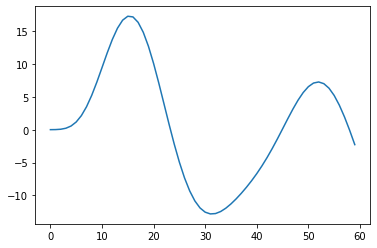

In [16]:
plt.plot(yy)

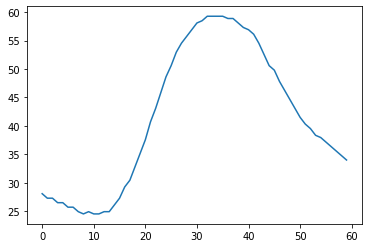

In [17]:
plt.plot(df[df['label'] == -1].iloc[0][:-1])

In [18]:
yy = butter_bandpass_filter(df[df['label'] == -1].iloc[0][:-1], lowcut, highcut, 100, order=5)

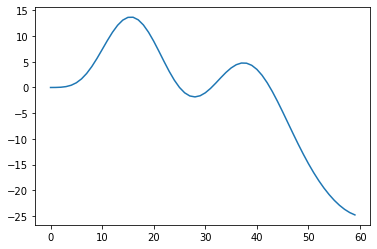

In [19]:
plt.plot(yy)

* filtering

In [20]:
dt_signal_1_bp = []
for i in dt_signal_1:
    yy = butter_bandpass_filter(i, lowcut, highcut, 128, order=5)
    dt_signal_1_bp.append(yy)

In [21]:
dt_signal_1

array([[28.07480049, 27.28479958, 27.28479958, ..., 35.57939911,
        34.78950119, 33.99950027],
       [42.68909836, 40.71419907, 40.31919861, ..., 56.90850067,
        56.90850067, 56.90850067],
       [50.58879852, 48.61389923, 47.82389832, ..., 57.30350113,
        58.09339905, 58.09339905],
       ...,
       [52.16870117, 50.58879852, 48.61389923, ..., 45.05899811,
        49.79880142, 54.93360138],
       [38.73929977, 38.34429932, 37.94929886, ..., 55.32860184,
        52.95869827, 51.37870026],
       [40.31919861, 40.31919861, 40.31919861, ..., 42.68909836,
        42.68909836, 41.89920044]])

In [22]:
dt_signal_1_bp

[array([ 3.29093634e-04,  3.36642550e-03,  1.71326768e-02,  5.87800910e-02,
         1.55170303e-01,  3.39918583e-01,  6.48272709e-01,  1.11138521e+00,
         1.75109071e+00,  2.57591223e+00,  3.57872125e+00,  4.73621344e+00,
         6.01009265e+00,  7.34967447e+00,  8.69555600e+00,  9.98397968e+00,
         1.11515289e+01,  1.21397966e+01,  1.28996392e+01,  1.33946514e+01,
         1.36036293e+01,  1.35219123e+01,  1.31615708e+01,  1.25504655e+01,
         1.17302597e+01,  1.07535361e+01,  9.68023704e+00,  8.57367505e+00,
         7.49638439e+00,  6.50608161e+00,  5.65200046e+00,  4.97186754e+00,
         4.48973811e+00,  4.21480483e+00,  4.14119913e+00,  4.24873584e+00,
         4.50450201e+00,  4.86516166e+00,  5.27981386e+00,  5.69319401e+00,
         6.04897519e+00,  6.29295619e+00,  6.37597548e+00,  6.25637280e+00,
         5.90179412e+00,  5.29024267e+00,  4.41047218e+00,  3.26189548e+00,
         1.85409448e+00,  2.05953949e-01, -1.65552328e+00, -3.69663128e+00,
        -5.8

### Autoencoder

In [23]:
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd

import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [24]:
data = list(dt_signal_1_bp)

In [25]:
label = list(lb_list)

In [26]:
df = pd.DataFrame(data)

In [27]:
df['label'] = label

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,0.000329,0.003366,0.017133,0.058780,0.155170,0.339919,0.648273,1.111385,1.751091,2.575912,...,-3.696631,-5.878509,-8.158710,-10.492714,-12.835335,-15.142026,-17.370091,-19.479818,-21.435549,-1.0
1,0.000500,0.005110,0.025953,0.088856,0.234061,0.511624,0.973600,1.665374,2.617793,3.841238,...,-8.757692,-7.681502,-6.546553,-5.357207,-4.121891,-2.853732,-1.570770,-0.295735,0.944623,-1.0
2,0.000593,0.006060,0.030796,0.105478,0.277872,0.607229,1.154787,1.973319,3.097807,4.538576,...,-11.015213,-9.911954,-8.781559,-7.632563,-6.473553,-5.313281,-4.160835,-3.025906,-1.919129,0.0
3,0.000417,0.004273,0.021781,0.074824,0.197750,0.433620,0.827657,1.419856,2.238192,3.293354,...,5.165524,6.339157,7.249145,7.857071,8.134401,8.063811,7.639884,6.869135,5.769361,0.0
4,0.000399,0.004083,0.020816,0.071536,0.189165,0.415096,0.792985,1.361733,2.149033,3.166364,...,5.401428,6.624730,7.553813,8.151109,8.390947,8.260522,7.760084,6.902410,5.711658,0.0


* labeling : Norm=0, AbNorm=1

In [29]:
df['label'] = df['label'].map(lambda x : 0 if x == 0 else 1)

In [30]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,0.000329,0.003366,0.017133,0.058780,0.155170,0.339919,0.648273,1.111385,1.751091,2.575912,...,-3.696631,-5.878509,-8.158710,-10.492714,-12.835335,-15.142026,-17.370091,-19.479818,-21.435549,1
1,0.000500,0.005110,0.025953,0.088856,0.234061,0.511624,0.973600,1.665374,2.617793,3.841238,...,-8.757692,-7.681502,-6.546553,-5.357207,-4.121891,-2.853732,-1.570770,-0.295735,0.944623,1
2,0.000593,0.006060,0.030796,0.105478,0.277872,0.607229,1.154787,1.973319,3.097807,4.538576,...,-11.015213,-9.911954,-8.781559,-7.632563,-6.473553,-5.313281,-4.160835,-3.025906,-1.919129,0
3,0.000417,0.004273,0.021781,0.074824,0.197750,0.433620,0.827657,1.419856,2.238192,3.293354,...,5.165524,6.339157,7.249145,7.857071,8.134401,8.063811,7.639884,6.869135,5.769361,0
4,0.000399,0.004083,0.020816,0.071536,0.189165,0.415096,0.792985,1.361733,2.149033,3.166364,...,5.401428,6.624730,7.553813,8.151109,8.390947,8.260522,7.760084,6.902410,5.711658,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.000496,0.005090,0.026010,0.089637,0.237787,0.523647,1.004283,1.732011,2.746331,4.067527,...,-16.612433,-16.575956,-16.565113,-16.576032,-16.601811,-16.633338,-16.660131,-16.671133,-16.655418,0
1196,0.000463,0.004758,0.024309,0.083752,0.222090,0.488850,0.937046,1.615055,2.558953,3.786421,...,-14.444221,-14.489084,-14.560174,-14.648976,-14.744448,-14.834031,-14.904660,-14.943705,-14.939781,0
1197,0.000612,0.006254,0.031799,0.108923,0.286910,0.626873,1.192052,2.037170,3.198920,4.688944,...,-14.331095,-14.312695,-14.388150,-14.541576,-14.749576,-14.981196,-15.198183,-15.355806,-15.404373,0
1198,0.000454,0.004653,0.023720,0.081491,0.215370,0.472232,0.901273,1.545980,2.436789,3.585501,...,3.758928,5.272179,6.534264,7.489449,8.090979,8.303408,8.104392,7.485779,6.453926,0


In [31]:
df['label'].value_counts()

0    1013
1     187
Name: label, dtype: int64

* Remove NaN

In [32]:
df_drop = df.dropna()

In [33]:
raw_data_norm = df_drop.values

* Norm : for train

In [34]:
labels = raw_data_norm[:, -1]
data = raw_data_norm[:, 0:-1]

* train tune split

In [35]:
train_data, valid_data, train_labels, valid_labels = train_test_split(
    data, labels, test_size=0.3, random_state=21
)

In [36]:
print(train_data.shape, train_labels.shape, valid_data.shape, valid_labels.shape)

(820, 60) (820,) (352, 60) (352,)


In [37]:
valid_data, test_data, valid_labels, test_labels = train_test_split(
    valid_data, valid_labels, test_size=0.5, random_state=21
)

In [38]:
print(train_data.shape, train_labels.shape, valid_data.shape, valid_labels.shape, test_data.shape, test_labels.shape)

(820, 60) (820,) (176, 60) (176,) (176, 60) (176,)


In [39]:
list(train_labels).count(1)

126

In [40]:
list(train_labels).count(0)

694

In [41]:
list(valid_labels).count(1)

29

In [42]:
list(valid_labels).count(0)

147

In [43]:
list(test_labels).count(1)

23

In [44]:
list(test_labels).count(0)

153

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
scaler.fit(train_data)

MinMaxScaler()

In [48]:
train_data = scaler.transform(train_data)
valid_data = scaler.transform(valid_data)
test_data = scaler.transform(test_data)

In [49]:
train_data = tf.cast(train_data, tf.float32)
valid_data = tf.cast(test_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

2022-11-29 06:35:36.717558: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 06:35:36.721348: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 06:35:36.721432: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 06:35:36.721810: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

* train only norm

In [50]:
train_only_data = []
train_only_label = []
for dt, lb in zip(train_data, train_labels):
    if lb == True:
        train_only_data.append(dt)
        train_only_label.append(lb)

In [51]:
train_only_data = tf.cast(train_only_data, tf.float32)

In [52]:
valid_only_data = []
valid_only_label = []
for dt, lb in zip(valid_data, valid_labels):
    if lb == True:
        valid_only_data.append(dt)
        valid_only_label.append(lb)

In [53]:
valid_only_data = tf.cast(valid_only_data, tf.float32)

In [54]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()

    self.encoder = tf.keras.Sequential([
      layers.Dense(60, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(4, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(60, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [55]:
autoencoder.compile(optimizer='adam', loss='mae')

In [56]:
history = autoencoder.fit(train_only_data, train_only_data, 
          epochs=500, 
          batch_size=64,
          validation_data=(valid_only_data, valid_only_data),
          shuffle=True)

Epoch 1/500
2/2 [==============================] - 1s 66ms/step - loss: 0.1175 - val_loss: 0.1129
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1170 - val_loss: 0.1124
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1165 - val_loss: 0.1117
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 0.1159 - val_loss: 0.1110
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 0.1152 - val_loss: 0.1102
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 0.1145 - val_loss: 0.1092
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 0.1136 - val_loss: 0.1082
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 0.1128 - val_loss: 0.1071
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1119 - val_loss: 0.1060
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1110 - val_loss: 0.1049
Epoch 11/500
2/2 [===

2022-11-29 06:35:38.280865: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2/2 [==============================] - 0s 11ms/step - loss: 0.1093 - val_loss: 0.1029
Epoch 13/500
2/2 [==============================] - 0s 11ms/step - loss: 0.1084 - val_loss: 0.1019
Epoch 14/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1075 - val_loss: 0.1008
Epoch 15/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1066 - val_loss: 0.0999
Epoch 16/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1057 - val_loss: 0.0990
Epoch 17/500
2/2 [==============================] - 0s 9ms/step - loss: 0.1049 - val_loss: 0.0981
Epoch 18/500
2/2 [==============================] - 0s 11ms/step - loss: 0.1041 - val_loss: 0.0972
Epoch 19/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1034 - val_loss: 0.0964
Epoch 20/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1027 - val_loss: 0.0956
Epoch 21/500
2/2 [==============================] - 0s 9ms/step - loss: 0.1020 - val_loss: 0.0949
Epoch 22/500
2/2 [=======

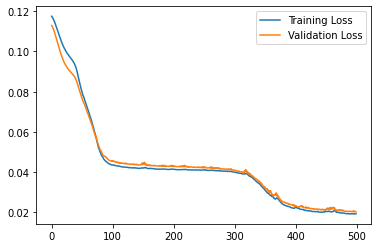

In [57]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

* valid

In [58]:
valid_ab_data = []
valid_ab_label = []
for dt, lb in zip(valid_data, valid_labels):
    if lb == False:
        valid_ab_data.append(dt)
        valid_ab_label.append(lb)

In [59]:
valid_ab_data = tf.cast(valid_ab_data, tf.float32)

* valid : Norm

In [60]:
encoded_imgs = autoencoder.encoder(valid_only_data).numpy()
# noral_test_data : latent vector
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

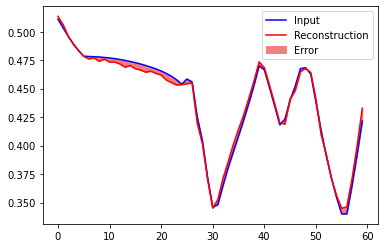

In [61]:
plt.plot(valid_only_data[0], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[0], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[0], valid_only_data[0], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

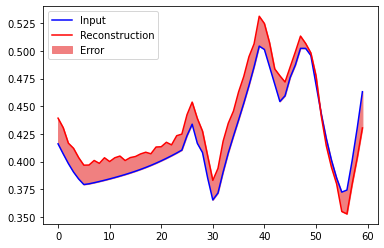

In [62]:
plt.plot(valid_only_data[1], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[1], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[1], valid_only_data[1], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

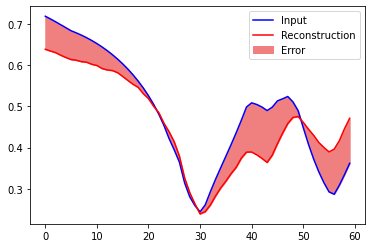

In [63]:
plt.plot(valid_only_data[2], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[2], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[2], valid_only_data[2], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

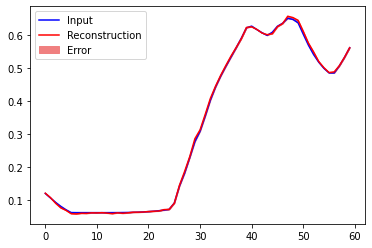

In [64]:
plt.plot(valid_only_data[13], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[13], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[13], valid_only_data[13], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

* valid : abnormal

In [65]:
encoded_imgs = autoencoder.encoder(valid_ab_data).numpy()
# noral_test_data를 encoder에 입력 : latent vector
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

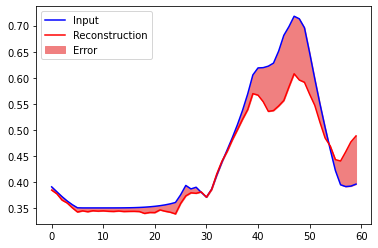

In [66]:
plt.plot(valid_ab_data[1], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[1], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[1], valid_ab_data[1], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

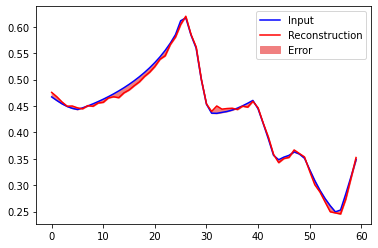

In [67]:
plt.plot(valid_ab_data[3], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[3], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[3], valid_ab_data[3], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

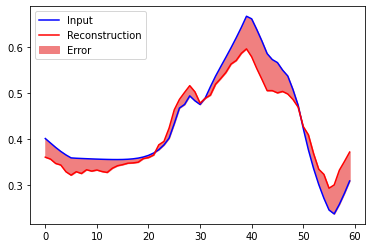

In [68]:
plt.plot(valid_ab_data[4], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[4], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[4], valid_ab_data[4], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

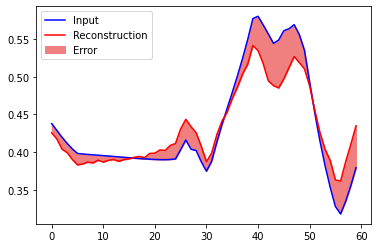

In [69]:
plt.plot(valid_ab_data[5], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[5], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[5], valid_ab_data[5], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [70]:
reconstructions = autoencoder.predict(valid_only_data)

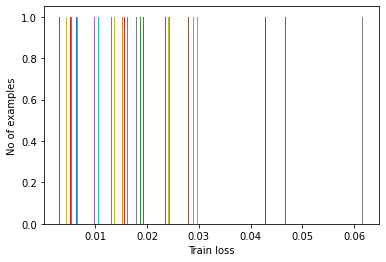

In [71]:
reconstructions = autoencoder.predict(valid_only_data)
test_loss = tf.keras.losses.mae(reconstructions, valid_only_data)
# 정상데이터와 복원한 데이터의 mae

plt.hist(test_loss)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [75]:
threshold = np.mean(test_loss) + np.std(test_loss)
print("Threshold: ", threshold)

Threshold:  0.03534849


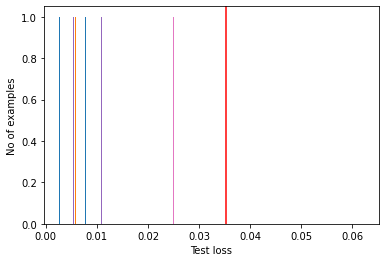

In [76]:
plt.hist(test_loss, bins=30)
plt.xlabel('Test loss')
plt.ylabel('No of examples')
plt.axvline(x=threshold, ymin=0.0, ymax=80, c='red')

plt.show()


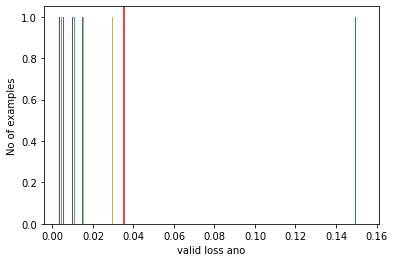

In [77]:
reconstructions_ano = autoencoder.predict(valid_ab_data)
# 비정상 데이터
valid_loss_ano = tf.keras.losses.mae(reconstructions_ano, valid_ab_data)
# 비정상 데이터와 그 복원 데이터의 mae

plt.hist(valid_loss_ano, bins=30)
plt.xlabel('valid loss ano')
plt.ylabel('No of examples')
plt.axvline(x=threshold, ymin=0.0, ymax=80, c='red')

plt.show()

* test

In [78]:
def predict(model, data, threshold):
    # model, data, threshold input
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    # mae
    return tf.math.less(threshold, loss)
    #  loss < threshold : Normal

In [79]:
reconstructions = autoencoder(test_data)
loss = tf.keras.losses.mae(reconstructions, test_data)

In [80]:
preds = predict(autoencoder, test_data, threshold)

In [81]:
preds = preds.numpy()

In [82]:
def bi2num(x):
    if x == True:
        return 1
    else:
        return 0

In [83]:
preds_ans = []
for i in preds:
    preds_ans.append(bi2num(i))

In [84]:
test_concat_label_ans = []
for i in test_labels:
    test_concat_label_ans.append(bi2num(i))

In [85]:
cf_matrix = confusion_matrix(test_concat_label_ans, preds_ans)

In [86]:
np.save('/workspace/DL_result/ate_y_test', test_concat_label_ans)

In [87]:
np.save('/workspace/DL_result/ate_preds', preds_ans)

In [88]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

In [89]:
y_actu = pd.Series(test_concat_label_ans, name='Actual')
y_pred = pd.Series(preds_ans, name='Predicted')
df_confusion_margin = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=False)

In [90]:
df_confusion_margin

Predicted,0,1,All
Actual,,,
0,134,19,153
1,14,9,23
All,148,28,176


In [91]:
def get_counts(seq): 
    counts = {}
    for x in seq:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [92]:
from sklearn.metrics import balanced_accuracy_score

In [93]:
print('class weights:', get_counts(preds_ans))
print(df_confusion_margin)
print('accuracy_score:', accuracy_score(test_concat_label_ans, preds_ans))
print('balanced_accuracy_score:', balanced_accuracy_score(test_concat_label_ans, preds_ans))
print('recall_score:', recall_score(test_concat_label_ans, preds_ans, average='macro'))
print('PPV(precision_score):', precision_score(test_concat_label_ans, preds_ans, average='macro'))
print('f1_score:', f1_score(test_concat_label_ans, preds_ans, average='macro'))

class weights: {1: 28, 0: 148}
Predicted    0   1  All
Actual                 
0          134  19  153
1           14   9   23
All        148  28  176
accuracy_score: 0.8125
balanced_accuracy_score: 0.6335606706450696
recall_score: 0.6335606706450696
PPV(precision_score): 0.6134169884169884
f1_score: 0.6216533124877859


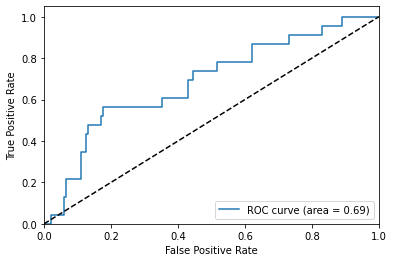

roc_auc_score:  0.6871270247229326


In [108]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

n_classes = 2
# ROC & AUC
roc_auc = roc_auc_score(test_concat_label_ans, loss)
fpr, tpr, _ = roc_curve(test_concat_label_ans, loss)


# Plot of a ROC curve for a specific class
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(test_concat_label_ans, loss))